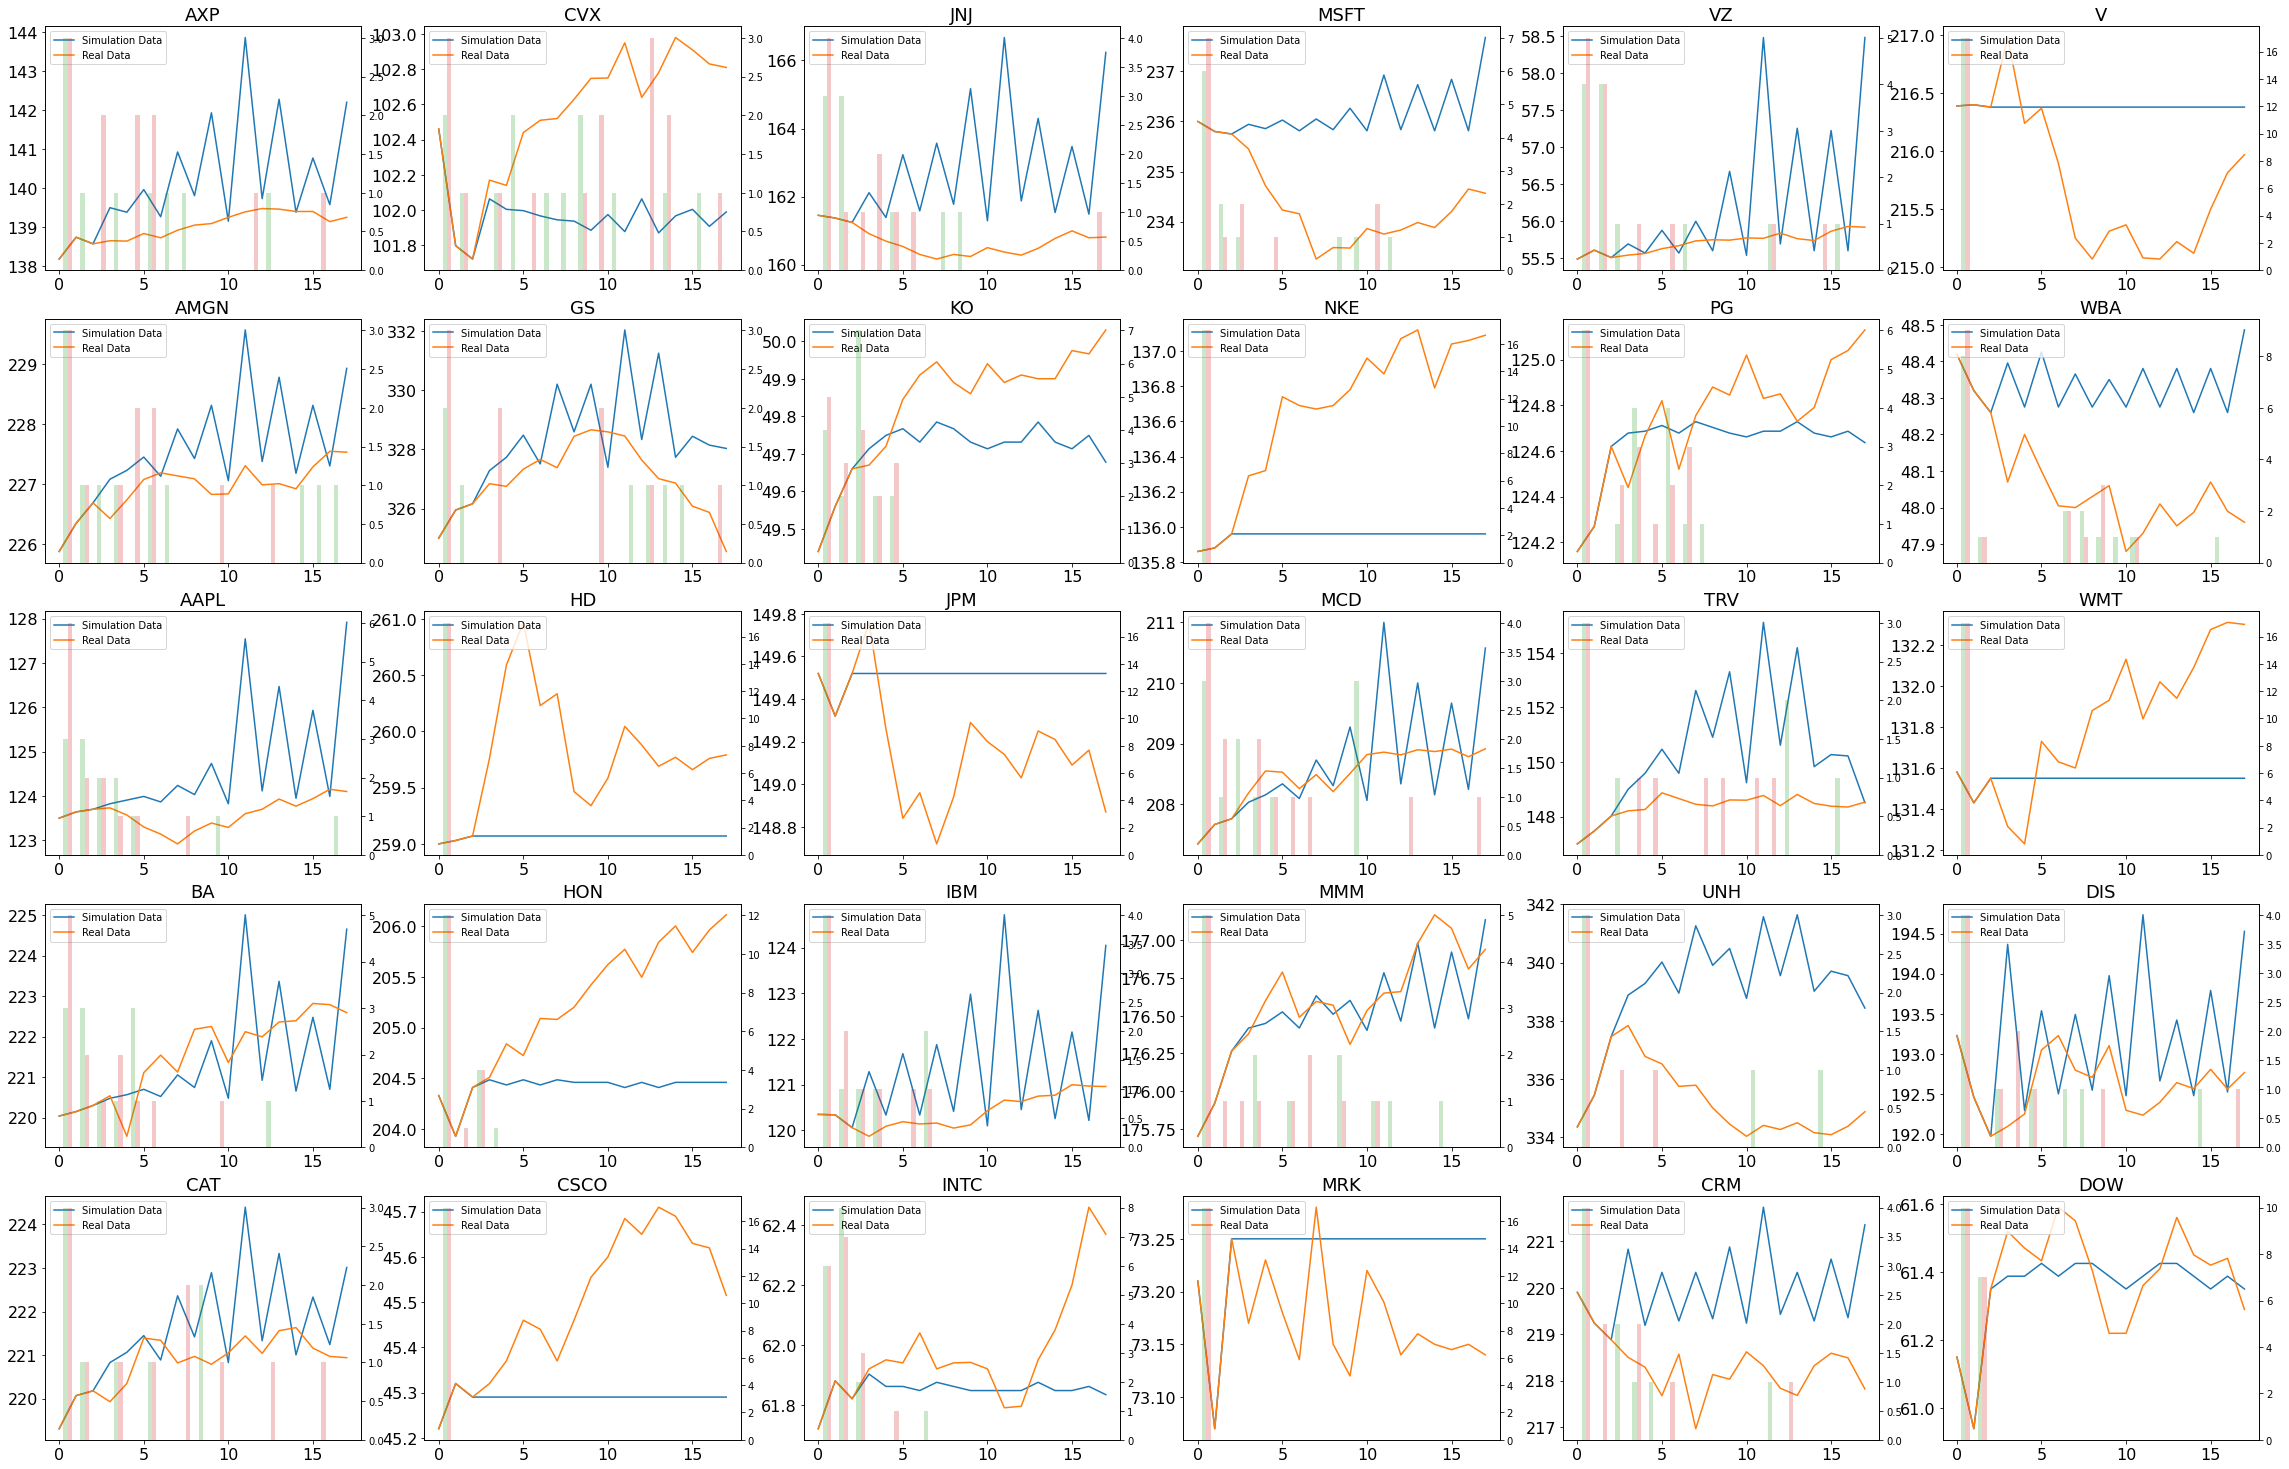

In [3]:
# === Graph Single Asset Price === #
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

assets = ['AXP','AMGN','AAPL','BA','CAT','CSCO','CVX','GS','HD','HON','IBM','INTC','JNJ','KO','JPM','MCD','MMM','MRK','MSFT','NKE','PG','TRV','UNH','CRM','VZ','V','WBA','WMT','DIS','DOW']

fig, axs = plt.subplots(5,6,figsize=(30,26))

def get_model_data(ticker=None):
    price_list = pd.read_csv(f'./model_data/assets/vars/{ticker}_vars.csv')['price']
    return (range(len(price_list)), price_list)

def get_real_data(ticker=None):
    price_list = pd.read_csv(f'./training_data/{ticker}.csv')['Open']
    return price_list

def get_model_volumes(ticker=None):
    bid_volumes = pd.read_csv(f'./model_data/assets/vars/{ticker}_vars.csv')['bid_volume']
    offer_volumes = pd.read_csv(f'./model_data/assets/vars/{ticker}_vars.csv')['offer_volume']
    return (bid_volumes,offer_volumes)

for asset in assets:
    model_data = get_model_data(asset)
    real_data = get_real_data(asset)

    volumes = get_model_volumes(asset)
    bid_volumes = volumes[0]
    offer_volumes = volumes[1]

    if assets.index(asset) < 5:
        x_loc = assets.index(asset)
        y_loc = 0

    elif assets.index(asset) < 10:
        x_loc = assets.index(asset) - 6
        y_loc = 1

    elif assets.index(asset) < 15:
        x_loc = assets.index(asset) - 12
        y_loc = 2

    elif assets.index(asset) < 20:
        x_loc = assets.index(asset) - 18
        y_loc = 3

    elif assets.index(asset) < 25:
        x_loc = assets.index(asset) - 24
        y_loc = 4

    elif assets.index(asset) < 30:
        x_loc = assets.index(asset) - 30
        y_loc = 5

    else:
        break

    # Volumes Histogram
    temp_ax = axs[x_loc,y_loc].twinx()
    temp_ax.hist([bid_volumes,offer_volumes],model_data[0],label=["Buy","Sell"],color=['tab:green','tab:red'],alpha=0.25,rwidth=.5)

    axs[x_loc,y_loc].plot(model_data[0],model_data[1],label="Simulation Data",alpha=1)
    axs[x_loc,y_loc].plot(model_data[0],real_data[0:len(model_data[0])],label="Real Data",alpha=1)

    axs[x_loc,y_loc].set_title(asset,fontdict={'fontsize':18})
    axs[x_loc,y_loc].tick_params(axis='both',which='both',labelsize=16)

    axs[x_loc,y_loc].legend(loc="upper left")

plt.subplots_adjust(right=1.15)
plt.savefig('./results/asset_prices.png')

In [ ]:
# === Graph Correlation Matrix === #
